<a href="https://colab.research.google.com/github/Joshmen06/Deep-Neural-Networks-hand_writting_recognition_project/blob/main/step5_1_hand_writting_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.test.gpu_device_name

<function tensorflow.python.framework.test_util.gpu_device_name>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [5]:
(trainX, trainy),(testX, test_y) = mnist.load_data()

In [6]:
print(trainX.shape, trainy.shape)
print(testX.shape, test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
img_shape=trainX.shape[1:]
img_shape

(28, 28)

In [9]:
trainX= trainX.astype('float32')/255.0
testx= testX.astype('float32')/255.0

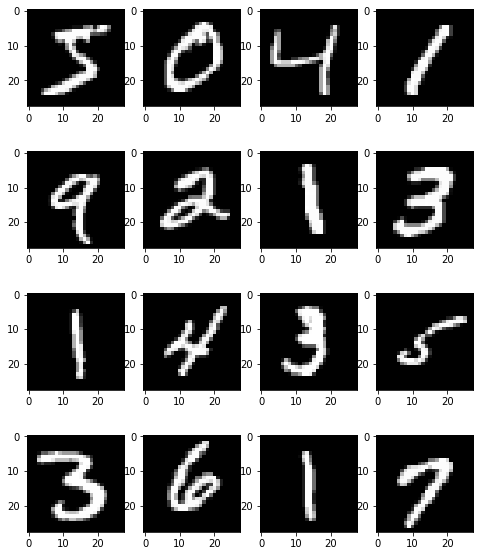

In [10]:
plt.figure(figsize=(8,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(trainX[i], cmap='gray')
plt.show()

model building

In [14]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

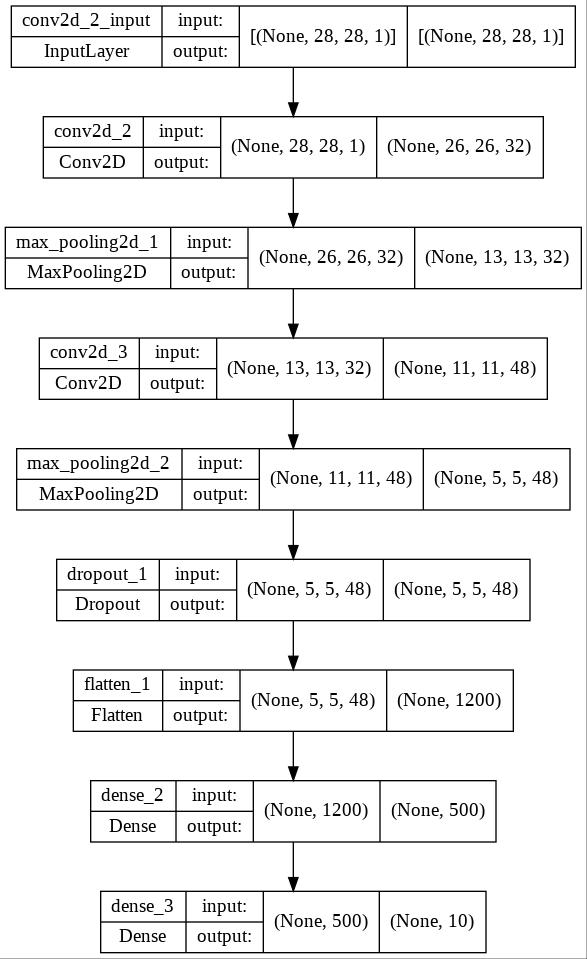

In [16]:
tf.keras.utils.plot_model(model, 'model.jpg', show_shapes=True)

In [17]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [18]:
x=model.fit(trainX, trainy, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 40s - loss: 0.2430 - accuracy: 0.9266 - val_loss: 0.0585 - val_accuracy: 0.9842 - 40s/epoch - 94ms/step
Epoch 2/10
422/422 - 39s - loss: 0.0868 - accuracy: 0.9720 - val_loss: 0.0402 - val_accuracy: 0.9897 - 39s/epoch - 92ms/step
Epoch 3/10
422/422 - 39s - loss: 0.0612 - accuracy: 0.9805 - val_loss: 0.0369 - val_accuracy: 0.9893 - 39s/epoch - 91ms/step
Epoch 4/10
422/422 - 39s - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0308 - val_accuracy: 0.9918 - 39s/epoch - 92ms/step
Epoch 5/10
422/422 - 39s - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0288 - val_accuracy: 0.9902 - 39s/epoch - 92ms/step
Epoch 6/10
422/422 - 38s - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.0300 - val_accuracy: 0.9913 - 38s/epoch - 91ms/step
Epoch 7/10
422/422 - 38s - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0280 - val_accuracy: 0.9932 - 38s/epoch - 91ms/step
Epoch 8/10
422/422 - 38s - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0253 - val_accuracy: 0.9935 - 38s/epoch - 91ms/step


In [20]:
loss, accuarcy=model.evaluate(testX, test_y)

313/313 [==============================] - 3s 10ms/step - loss: 5.5670 - accuracy: 0.9895


prediction is 5


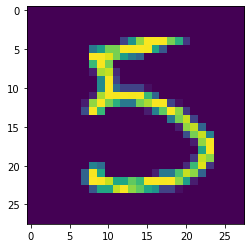

In [21]:
plt.imshow(testX[15])
pred=model.predict(testX)
print('prediction is',np.argmax(pred[15]))

prediction is 9


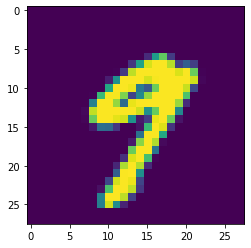

In [22]:
plt.imshow(testX[20])
pred=model.predict(testX)
print('prediction is',np.argmax(pred[20]))

prediction is 6


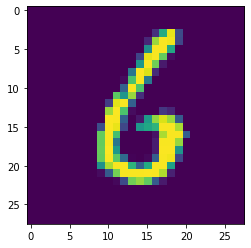

In [23]:
plt.imshow(testX[50])
pred=model.predict(testX)
print('prediction is',np.argmax(pred[50]))

prediction is 7


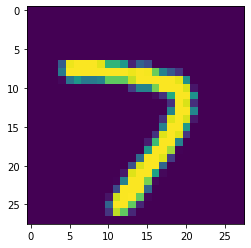

In [24]:
plt.imshow(testX[17])
pred=model.predict(testX)
print('prediction is',np.argmax(pred[17]))